## Python statistics essential training - 05_07_challenge

Standard imports

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

Loading gapminder data for year 1985 (Live Aid!).

In [6]:
gapminder = pd.read_csv('gapminder.csv')

In [7]:
gdata = gapminder.query('year == 1985')

Refactored plotting so that it works on arbitrary datasets.

In [8]:
def sc(data):
    return 1e-6 * data.population, data.region.map({'Africa': 'skyblue', 'Europe': 'gold',
                                                   'America': 'palegreen', 'Asia': 'coral'})

def plotdata(data=gdata):
    size, colors = sc(data)
    data.plot.scatter('age5_surviving','babies_per_woman',
                      c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)
                      
def plotfit(fit,data=gdata):
    plotdata(data)

    size, colors = sc(data)
    pp.scatter(data.age5_surviving,fit.predict(data),
               c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')

Our cross-validation function

In [9]:
# we'll make a function that is generic in terms of formula and response variable
def cross_validate(data,formula,response,n=100):
    ret = []
    
    for i in range(n):
        shuffled = data.sample(len(data))
        
        training = shuffled.iloc[:len(data)//2]
        testing = shuffled.iloc[len(data)//2:]
        
        trained = smf.ols(formula,data=training).fit()
        
        resid = trained.predict(testing) - testing[response]
        df = len(testing) - trained.df_model - 1
        mse = np.sum(resid**2) / df
    
        ret.append(mse)
    
    return np.mean(ret)

The best model formula we've found

In [10]:
f_surviving = 'babies_per_woman ~ -1 + region + age5_surviving'

1.0672744955704285

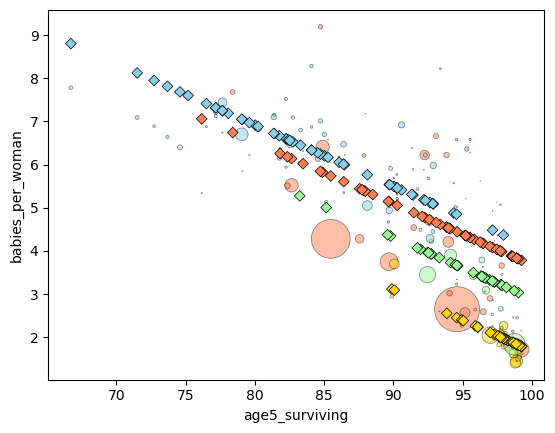

In [11]:
fit = smf.ols(f_surviving,gdata).fit()
plotfit(fit,gdata)
cross_validate(gdata,f_surviving,'babies_per_woman')

0.992329199060758

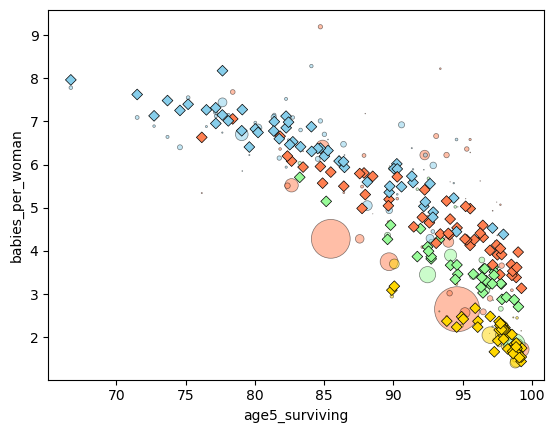

In [41]:
f_novel = 'babies_per_woman ~ -1 + year + region + age5_surviving:life_expectancy'

fit = smf.ols(f_novel,gdata).fit()
plotfit(fit,gdata)
results_list = []
for i in range(3) :
    results_list.append(cross_validate(gdata,f_novel,'babies_per_woman'))
np.mean(results_list)